### 输出层的设计
神经网络可以用在分类问题和回归问题上，不过需要根据情况改变输出层的激活函数。<br>

机器学习的问题大致可以分为**分类问题**和**回归问题**。<br>
分类问题是数据属于哪一个类别的问题。比如，区分图像中的人是男性还是女性的问题就是分类问题。<br>
而回归问题就是根据某个输入预测一个(连续的)数值得问题。比如，根据一个人的图像预测这个人的体重的问题就是回归问题。<br>
**一般而言，回归问题用恒等函数，分类问题用 softmax 函数**。<br>

#### 恒等函数
恒等函数会将输入按原样输出，对于输入的信息，不加以任何改动地直接输出。

#### softmax函数

$$y_k = \frac{exp(a_k)}{\sum_{i=1}^{n} exp(a_i)}$$

exp(x)是表示$e^x$的指数函数(e是纳皮尔常数2.7182...)。上式表示假设输出层共有 n 个神经元，计算第 k 个神经元的输出 $y_k$。

用图表示 softmax 函数。

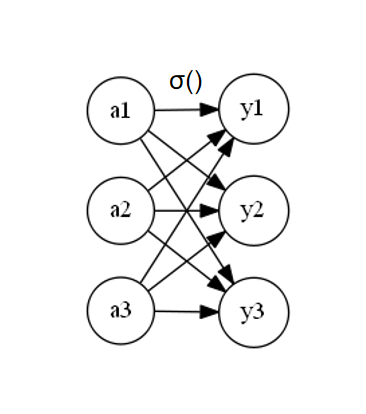

#### 实现softmax函数

In [22]:
# 逐步实现
import numpy as np

a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) # 指数函数
exp_a

array([ 1.34985881, 18.17414537, 54.59815003])

In [23]:
sum_exp_a = np.sum(exp_a) # 指数函数的和
sum_exp_a

74.1221542101633

In [24]:
y = exp_a / sum_exp_a
y

array([0.01821127, 0.24519181, 0.73659691])

In [25]:
# 将softmax定义为函数
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

$$y_k = \frac{exp(a_k)}{\sum_{i=1}^{n} exp(a_i)} = \frac{Cexp(a_k)}{C\sum_{i=1}^{n} exp(a_i)}
= \frac{exp(a_k) + logC}{\sum_{i=1}^{n} exp(a_i + logC)} = \frac{exp(a_k +{C}')}{\sum_{i=1}^{n} exp(a_i + {C}')}$$

首先，在分子和分母上都乘上C这个任意的常数。然后，把这个C移动到指数函数(exp)中，记为logC。最后，把logC替换为另一个符号C'。


这个式子说明，在进行softmax的指数函数的运算时，加上（或者减去）某个常数并不会改变运算的结果。这里的C'可以使用任何值，但是为了防止溢出，一般会使用输入信号中的最大值。

In [26]:
import numpy as np

a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) # softmax函数的运算
# 数值太大，无法被正确计算

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


array([nan, nan, nan])

In [27]:
c = np.max(a) # 1010
a - c

array([  0, -10, -20])

In [28]:
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

如该例所示，通过减去输入信号中的最大值(上例中的c)，我们发现原本为 **nan(not a number，不确定)** 的地方，现在被正确计算了。综上，我们可以像下面这样实现softmax函数。

In [29]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # 溢出对策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [32]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0